In [147]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

In [148]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


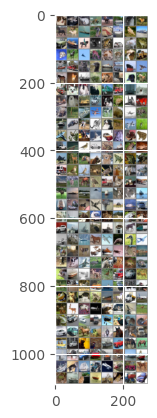

cat   cat   car   bird  horse ship  cat   deer  horse deer  ship  bird  truck ship  bird  truck car   ship  horse cat   frog  car   dog   frog  dog   horse plane deer  cat   deer  bird  truck ship  truck cat   bird  ship  truck ship  bird  horse cat   ship  frog  cat   truck bird  dog   truck dog   dog   bird  truck truck truck deer  truck dog   ship  car   dog   frog  plane car   dog   deer  ship  plane dog   dog   plane cat   ship  car   horse cat   dog   deer  plane cat   plane bird  horse ship  car   cat   cat   frog  truck bird  bird  car   frog  ship  frog  car   plane deer  horse horse dog   frog  frog  frog  truck bird  bird  deer  bird  deer  cat   plane plane cat   deer  bird  truck cat   cat   plane deer  ship  plane plane ship  cat   cat   ship  ship  car   dog   plane bird  plane ship  car   deer  plane horse truck frog  horse horse truck car   ship  ship  bird  ship  cat   horse truck plane frog  ship  horse plane bird  bird  plane horse truck dog   deer  ship  cat   frog

In [149]:

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [150]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding = 1)
        self.fc1 = nn.Linear(4 * 4 * 64, 500)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(500, 10)
        
        

        # self.conv1 = nn.Conv2d(3, 6, 5)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        # x = self.pool(F.relu(self.conv2(x)))
        # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        
        
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        return x

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
net = Net().to(device)

cuda:0


In [151]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [152]:
PATH = './cifar_new.pth'
net.load_state_dict(torch.load(PATH))

FileNotFoundError: [Errno 2] No such file or directory: './cifar_new.pth'

In [153]:
from tqdm import tqdm

epochs = 17
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in tqdm(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        # inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)


        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs,1)
  
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
    with torch.no_grad():
        for val_inputs, val_labels in testloader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = net(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            
            
            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_corrects += torch.sum(val_preds == val_labels.data)
        epoch_loss = running_loss/(len(trainloader)*batch_size)
        epoch_acc = running_corrects.float()/(len(trainloader)*batch_size)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc.cpu().numpy())
        
        val_epoch_loss = val_running_loss/(len(testloader)*batch_size)
        val_epoch_acc = val_running_corrects.float()/(len(testloader)*batch_size)
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc.cpu().numpy())
        
        
        print("epoch: ", (e+1))
        print("Training Loss: {:.4f}, acc {:.4f} ".format(val_epoch_loss, val_epoch_acc.item()))
        

print('Finished Training')

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.91it/s]


epoch:  1
Training Loss: 0.0073, acc 0.2955 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.77it/s]


epoch:  2
Training Loss: 0.0059, acc 0.4337 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.83it/s]


epoch:  3
Training Loss: 0.0053, acc 0.4997 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.50it/s]


epoch:  4
Training Loss: 0.0049, acc 0.5371 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.84it/s]


epoch:  5
Training Loss: 0.0046, acc 0.5675 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.06it/s]


epoch:  6
Training Loss: 0.0043, acc 0.5903 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.07it/s]


epoch:  7
Training Loss: 0.0040, acc 0.6158 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.31it/s]


epoch:  8
Training Loss: 0.0039, acc 0.6330 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.47it/s]


epoch:  9
Training Loss: 0.0036, acc 0.6602 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.50it/s]


epoch:  10
Training Loss: 0.0036, acc 0.6681 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.17it/s]


epoch:  11
Training Loss: 0.0034, acc 0.6833 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.61it/s]


epoch:  12
Training Loss: 0.0033, acc 0.6935 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.44it/s]


epoch:  13
Training Loss: 0.0033, acc 0.6941 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.30it/s]


epoch:  14
Training Loss: 0.0034, acc 0.6901 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.75it/s]


epoch:  15
Training Loss: 0.0033, acc 0.7033 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 27.39it/s]


epoch:  16
Training Loss: 0.0033, acc 0.7009 


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:07<00:00, 26.69it/s]


epoch:  17
Training Loss: 0.0032, acc 0.7037 
Finished Training


In [154]:
torch.save(net.state_dict(), PATH)


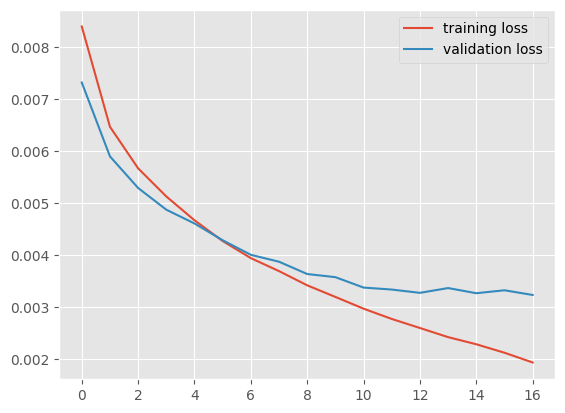

In [155]:
plt.style.use("ggplot")
plt.plot(running_loss_history, label = "training loss")
plt.plot(val_running_loss_history, label = "validation loss")
plt.legend()

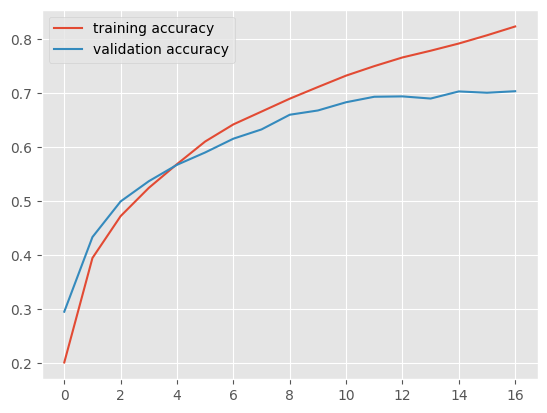

In [156]:
plt.style.use("ggplot")
plt.plot(running_corrects_history, label = "training accuracy")
plt.plot(val_running_corrects_history, label = "validation accuracy")
plt.legend()

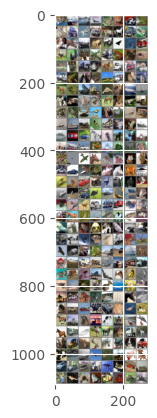

GroundTruth:  cat   ship  ship  plane


In [157]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [158]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [159]:
outputs = net(images)
outputs.shape

torch.Size([256, 10])

In [160]:
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10)) 
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
    
for i in range(10):
    print(f'Accuracy of %5s : %2d %%' % (classes[i], 100* class_correct[i]/class_total[i]))

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.31it/s]

Accuracy of plane : 68 %
Accuracy of   car : 92 %
Accuracy of  bird : 92 %
Accuracy of   cat : 40 %
Accuracy of  deer : 61 %
Accuracy of   dog : 66 %
Accuracy of  frog : 61 %
Accuracy of horse : 66 %
Accuracy of  ship : 85 %
Accuracy of truck : 82 %
Accuracy of the network on the 10000 test images: 72 %
